In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
Cart = pd.read_csv("smartcart_customers.csv")

In [3]:
Cart.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
Cart.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
dtype: object

# Data Preprocessing

# Handle Missing Values

In [5]:
Cart["Income"] = Cart["Income"].fillna(Cart["Income"].median())

In [6]:
Cart.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# Feature Engineering

In [7]:
# Age

Cart["Age"] = 2026 - Cart["Year_Birth"]

In [8]:
Cart.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45


In [9]:
# Customer Joining Date

Cart["Dt_Customer"] = pd.to_datetime(Cart["Dt_Customer"], dayfirst=True)

refrence_date = Cart["Dt_Customer"].max()

Cart["Customer_Tenure_Days"] = (refrence_date - Cart["Dt_Customer"]).dt.days

In [10]:
Cart.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [11]:
Cart.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days'],
      dtype='object')

In [12]:
# Spending

Cart["Total_Spending"] = Cart["MntWines"] + Cart["MntFruits"] + Cart["MntMeatProducts"] + Cart["MntFishProducts"] + Cart["MntSweetProducts"] + Cart["MntGoldProds"]

In [13]:
# Children

Cart["Total_Children"] = Cart["Kidhome"] + Cart["Teenhome"]

In [14]:
# Education

Cart["Education"].value_counts()

Cart["Education"] = Cart["Education"].replace({
    "Basic": "Undergraduate", "2n Cycle" : "Undergraduate",
    "Graduation" : "Graduate",
    "Master" : "Postgraduate", "PhD" : "Postgraduate"
})

In [15]:
# Marital Status

Cart["Marital_Status"].value_counts()

Cart["Living_with"] = Cart["Marital_Status"].replace({
    "Married": "Partner", "Together" : "Partner",
    "Single" : "Alone", "Divorced" : "Alone",
    "Widow" : "Alone", "Absurd" : "Alone", "YOLO" : "Alone"
})

In [16]:
Cart["Living_with"].value_counts()

Living_with
Partner    1444
Alone       796
Name: count, dtype: int64

## Drop Columns

In [17]:
Cart.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_with
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [18]:
Cart.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_Spending',
       'Total_Children', 'Living_with'],
      dtype='object')

In [19]:
cols = ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer"]
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

cols_to_drop = cols + spending_cols

Cart_cleaned = Cart.drop(columns = cols_to_drop)

In [20]:
Cart_cleaned.shape

(2240, 15)

# Outliers

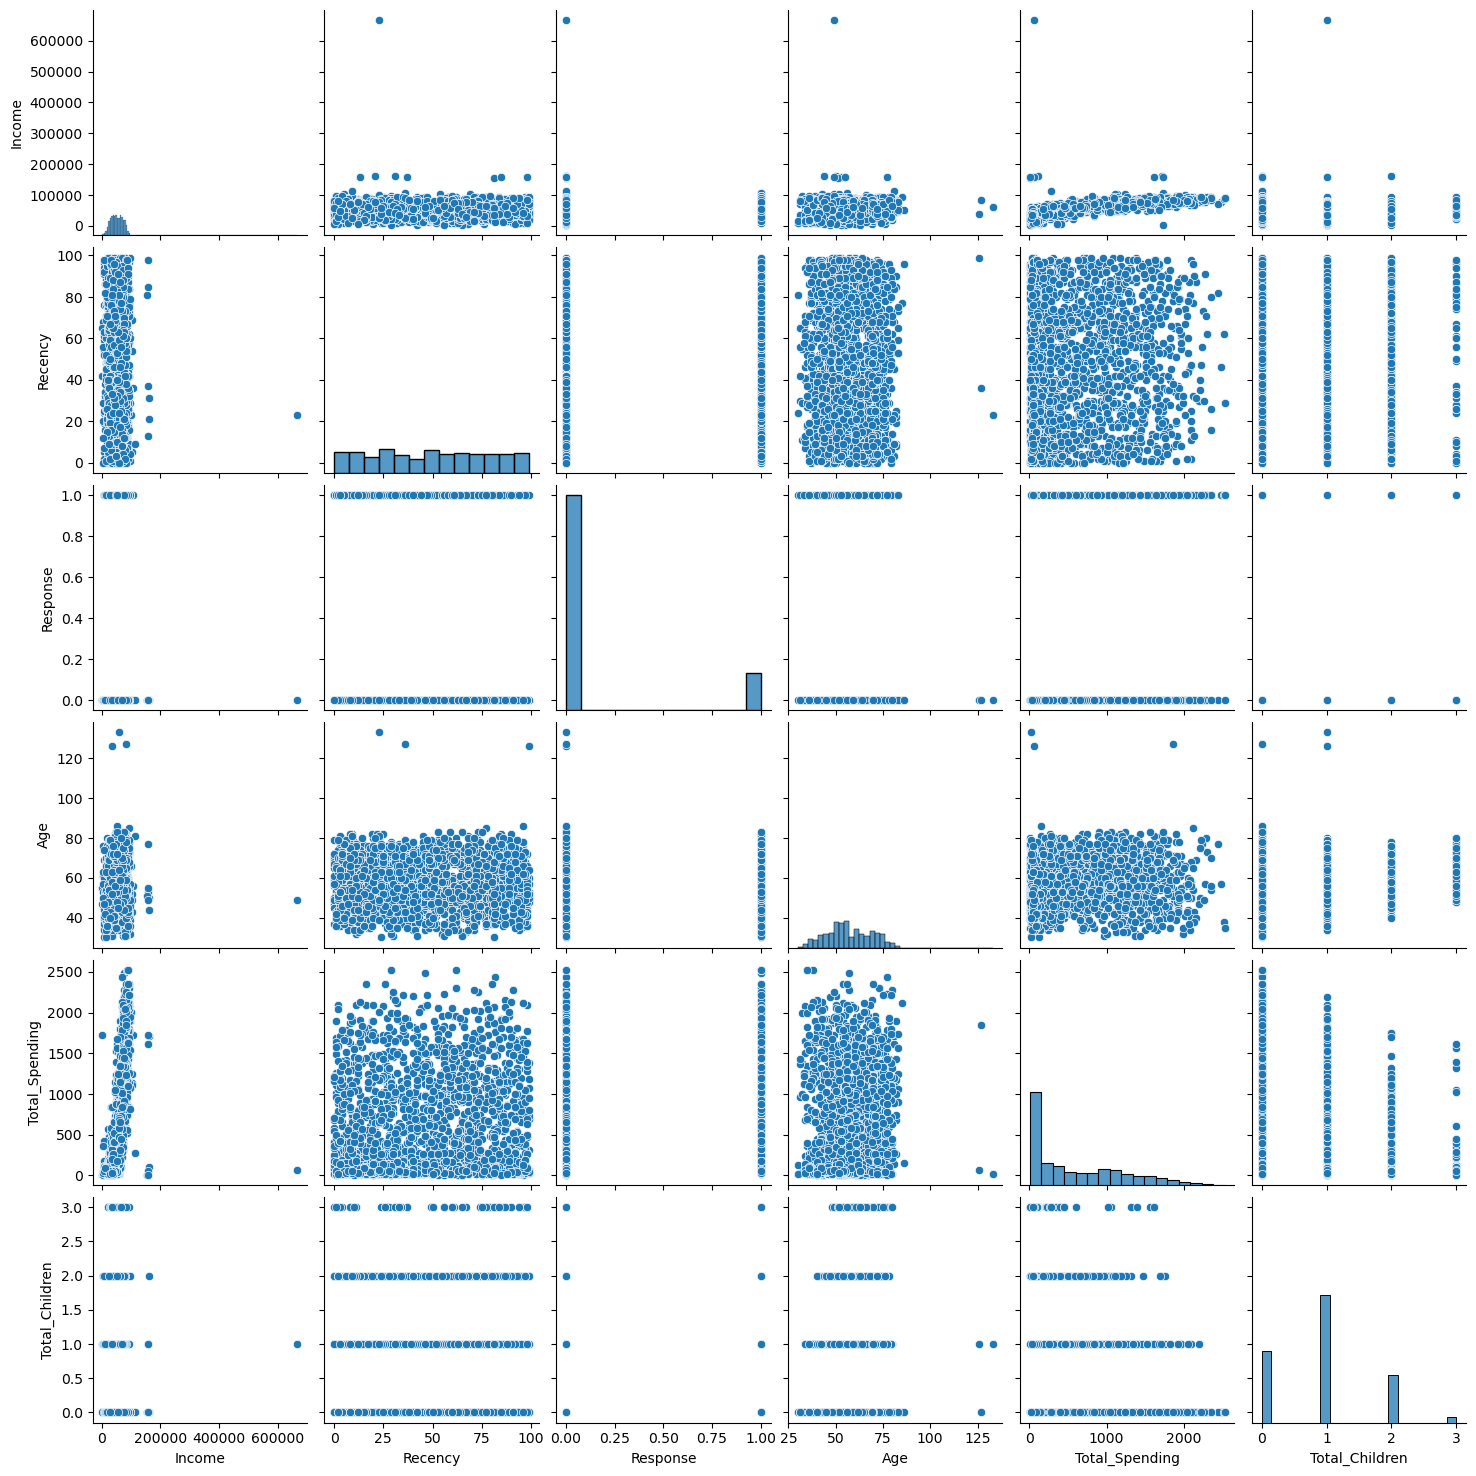

In [21]:
cols = ["Income", "Recency", "Response", "Age", "Total_Spending", "Total_Children"]

# relative plots of some features -> pair plots
sns.pairplot(Cart_cleaned[cols])

In [22]:
# Remove the Outliers

print("Data Size with Outliers", len(Cart_cleaned))

Cart_cleaned = Cart_cleaned[(Cart_cleaned["Age"] < 90)]
Cart_cleaned = Cart_cleaned[(Cart_cleaned["Income"] < 600000)]

print("Data Size without Outliers", len(Cart_cleaned))

Data Size with Outliers 2240
Data Size without Outliers 2236


# Correlation of Features -> Heatmap

In [23]:
corr = Cart_cleaned.corr(numeric_only=True)

<Axes: >

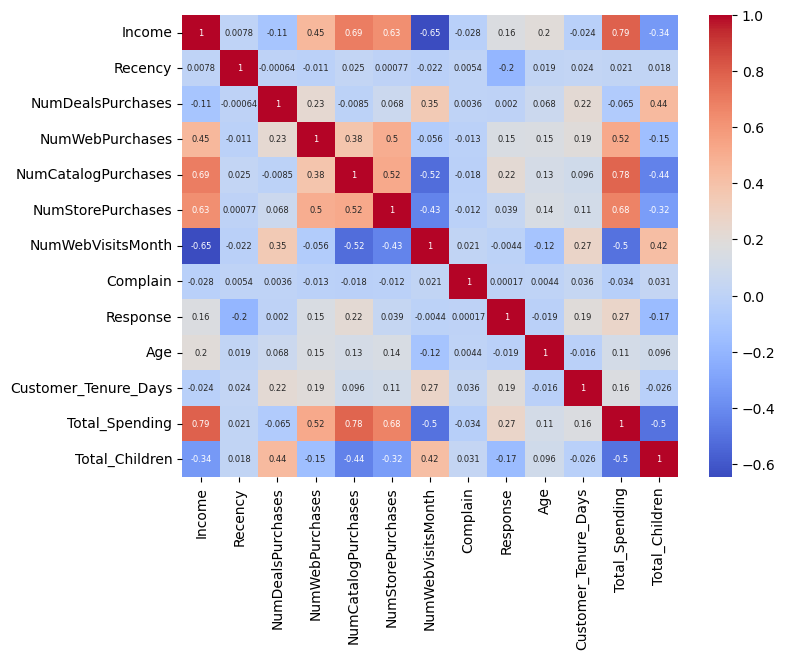

In [24]:
plt.figure(figsize=(8,6))

sns.heatmap(
    corr, 
    annot=True,
    annot_kws = {"size":6},
    cmap="coolwarm"
)

# Feature Encoding 

In [25]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Living_with"]

enc_cols = ohe.fit_transform(Cart_cleaned[cat_cols])

In [26]:
enc_Cart = pd.DataFrame(enc_cols.toarray(), columns=ohe.get_feature_names_out(cat_cols), index=Cart_cleaned.index)

In [27]:
encoded_Cart = pd.concat([Cart_cleaned.drop(columns=cat_cols), enc_Cart], axis=1)

In [28]:
encoded_Cart.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling

In [29]:
X = encoded_Cart

In [30]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]])

# Visualize

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X_scaled)

Text(0.5, 0.92, '3d Projection')

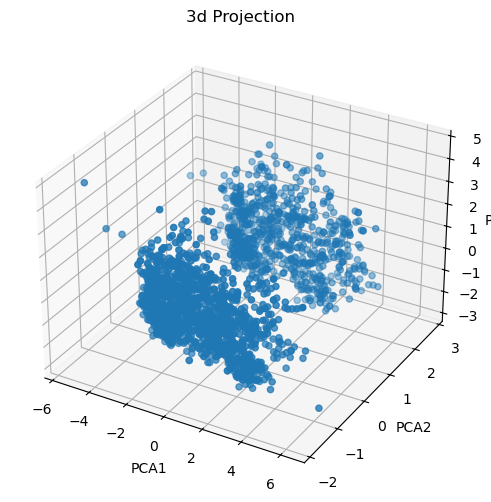

In [34]:
# PLot

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d Projection")

# Analyze K value

# 1. Elbow Method

In [35]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

E:\Anacondafiles\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\Anacondafiles\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "E:\Anacondafiles\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anacondafiles\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        

In [36]:
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow

In [37]:
print("best k = ", optimal_k)

best k =  4


Text(0, 0.5, 'wcss')

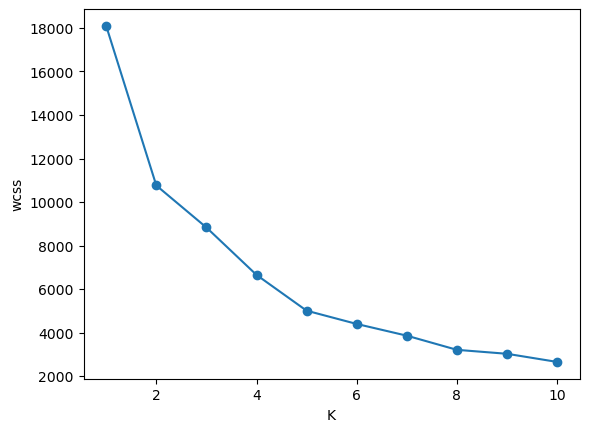

In [38]:
# plot

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("K")
plt.ylabel("wcss")

## Silhoutte Score

Text(0, 0.5, 'Silhoutte Score')

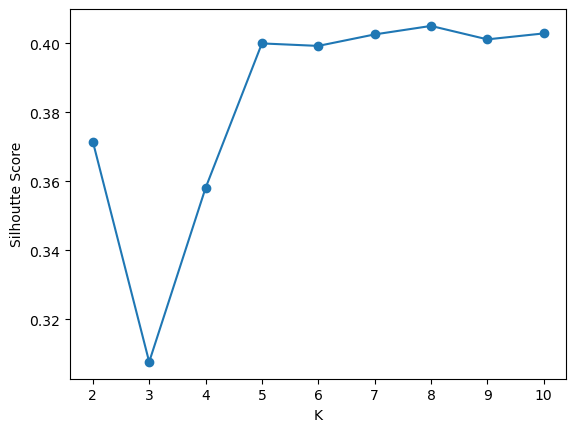

In [39]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)

# plot

plt.plot(range(2, 11), scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhoutte Score")

Text(0, 0.5, 'Scores')

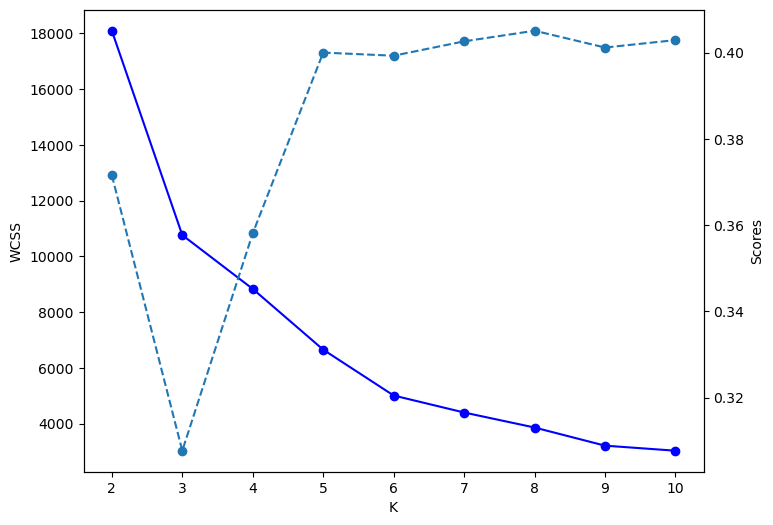

In [40]:
# Combined PLot

k_range = range(2, 11)

fig, ax1 =plt.subplots(figsize=(8, 6))

ax1.plot(k_range, wcss[:len(k_range)], marker="o", color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker="o", linestyle="--")
ax2.set_xlabel("K")
ax2.set_ylabel("Scores")

# Clustering

In [43]:
# K means 

kmeans = KMeans(n_clusters = 4, random_state = 42)
labels_kmeans = kmeans.fit_predict(X_pca)

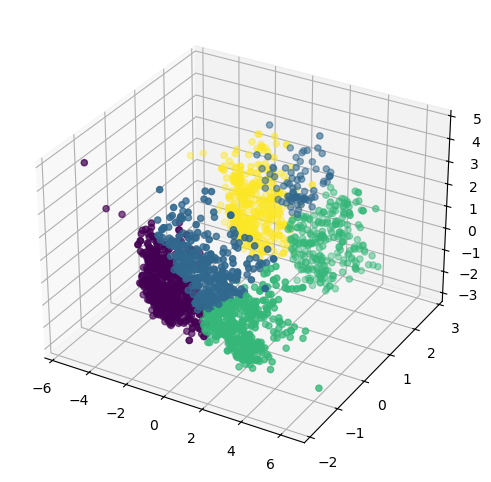

In [44]:
# Visualize

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels_kmeans)


In [45]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [46]:
agg_clf = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agg = agg_clf.fit_predict(X_pca)

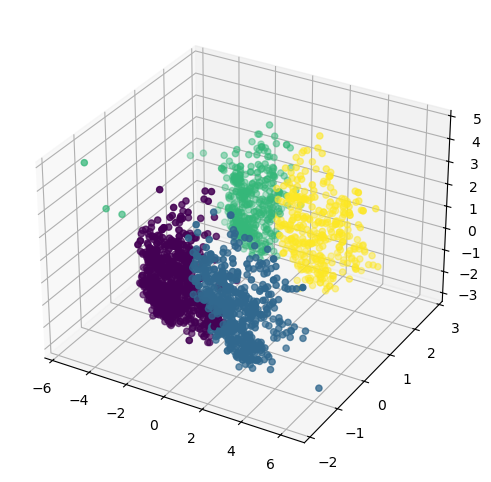

In [47]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels_agg)

# Characterization of Clusters

In [64]:

X["clusters"] = labels_agg

In [65]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

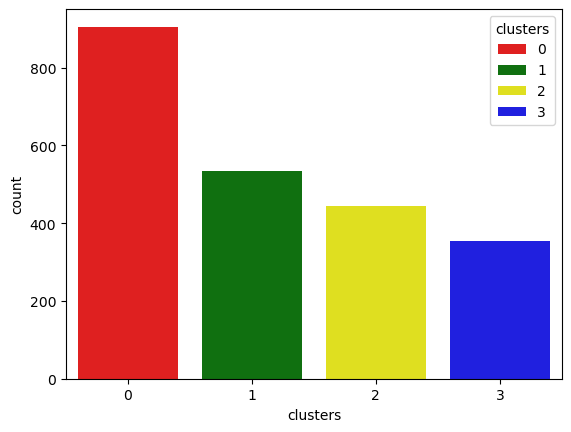

In [66]:
pal = ["red", "green", "yellow", "blue"]

sns.countplot(x=X["clusters"], palette = pal, hue=X["clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

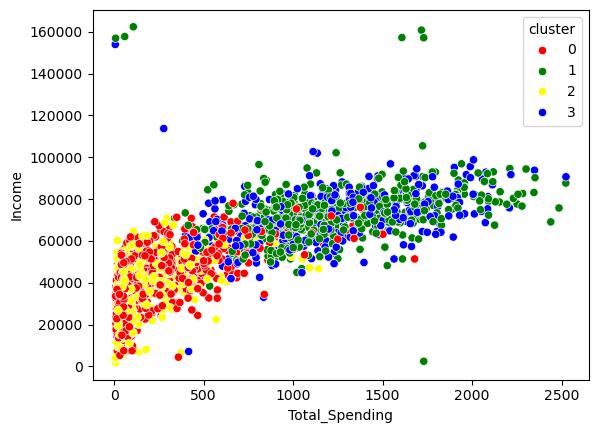

In [62]:
# Income & Spending pattern

sns.scatterplot(x=X["Total_Spending"], y=X["Income"], hue=X["cluster"], palette = pal)

In [68]:
# Cluster summary

cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_Tenure_Days  Total_Spending  \
clu